enter Max camber in ones:2
enter position of Max camber in 10s:40
enter Max. Thickness in 10s12


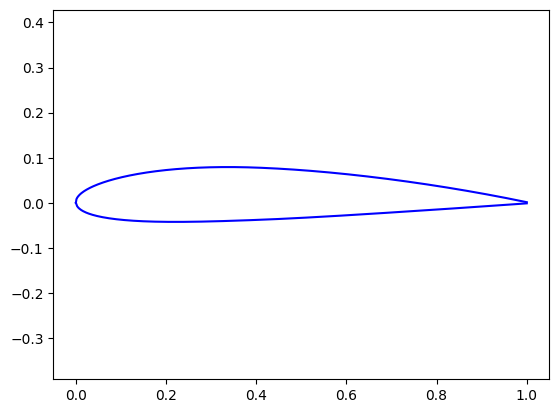

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Number of grid points
gridPts = 500

# Constants
a0 = 0.2969
a1 = -0.1260
a2 = -0.3516
a3 = 0.2843
a4 = -0.1015  # Open trailing edge
# a4 = -0.1036  # Closed trailing edge

# Calculations

# m,p,t are not in percentages
M = int(input('enter Max camber in ones:'))/100
P = int(input('enter position of Max camber in 10s:'))/100
T = int(input('enter Max. Thickness in 10s'))/100

# Airfoil grid
x = np.linspace(0, 1, gridPts)

# Camber and Gradient
yc = np.ones(gridPts)  # create array of 500 rows and 1 column
dyc_dx = np.ones(gridPts)
theta = np.ones(gridPts)

for i in range(gridPts):
    if 0 <= x[i] < P:
        yc[i] = (M / (P**2)) * ((2 * P * x[i]) - (x[i]**2))
        dyc_dx[i] = ((2 * M) / (P**2)) * (P - x[i])
    elif P <= x[i] <= 1:
        yc[i] = (M / ((1 - P)**2)) * (1 - (2 * P) + (2 * P * x[i]) - (x[i]**2))
        dyc_dx[i] = ((2 * M) / ((1 - P)**2)) * (P - x[i])
    theta[i] = np.arctan(dyc_dx[i])

# Thickness distribution
yt = 5 * T * (a0 * np.sqrt(x) + a1 * x + a2 * x**2 + a3 * x**3 + a4 * x**4)  # element-wise multiplication

# Upper surface points
xu = x - yt * np.sin(theta)
yu = yc + yt * np.cos(theta)

# Lower surface points
xl = x + yt * np.sin(theta)
yl = yc - yt * np.cos(theta)

# Plot the airfoil (with lines)
plt.figure(2)


plt.axis('equal')
plt.plot(xu, yu, 'b-')
plt.plot(xl, yl, 'b-')
plt.show()

